## Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
df = pd.read_csv('chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

In [9]:
temp = df.groupby('item_name').count()['order_id'].sort_values(ascending=False).head()

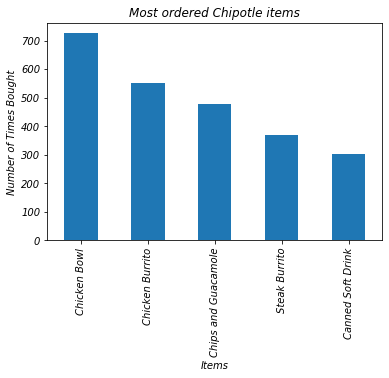

In [10]:
temp.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Bought')
plt.title('Most ordered Chipotle items')
plt.show();

In [3]:
# convert the dictionary to a DataFrame
cnt = pd.DataFrame.from_dict(Counter(df['item_name']), orient='index')

In [4]:
#sort values
cnt = cnt[0].sort_values(ascending=False).head()

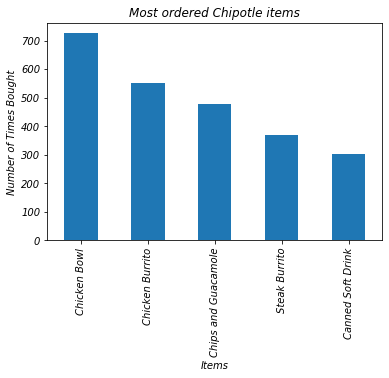

In [6]:
cnt.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Bought')
plt.title('Most ordered Chipotle items')
plt.show();

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [11]:
#data cleaning for 'item price' column
df['item_price'] = [float(value[1:-1])  for value in df.item_price]

In [13]:
#sum by order_id given that customers may purchase multiple items for single order
order = df.groupby('order_id').sum()

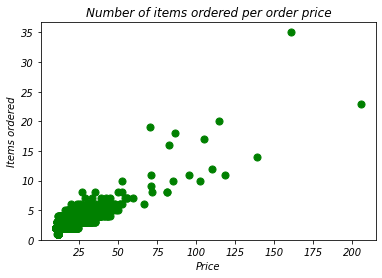

In [16]:
plt.scatter(order['item_price'], order['quantity'], s=50, c='green')
plt.xlabel('Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show();